In [19]:
import pandas as pd
import numpy as np
import warnings
import matplotlib.pyplot as plt


warnings.filterwarnings('ignore')

In [72]:
risk_1 = pd.read_csv("risk_factors_1.csv")
risk_2 = pd.read_csv("risk_factors_2.csv")

In [73]:
risk = pd.concat([risk_1,risk_2])
risk.to_csv("risk_factor.csv")

In [74]:
risk = pd.read_csv("risk_factor.csv")


In [75]:
ds = pd.read_csv("rtn_diff_period.csv")
ds = ds.drop("Unnamed: 0",axis =1)

In [76]:
da = pd.merge(risk,ds,on = ["data_date","security_id"],how = "left")

In [77]:
da

,Unnamed: 0,data_date,security_id,rf1,rf2,rf3,rf4,rf5,rf6,log_ret_1,log_ret_5,log_ret_10,log_ret_22,log_ret_66
0,0,20100104,5311701,0.284,-0.500,1.789,2.962,-0.435,-0.314,0.048900,0.106972,0.087108,0.064953,0.260861
1,1,20100104,3780701,1.890,-1.330,-0.208,0.775,-0.803,-0.576,-0.030937,-0.005312,-0.033673,-0.054435,0.131377
2,2,20100104,2297301,0.012,0.217,0.285,-0.151,0.883,0.127,-0.010515,-0.019008,-0.027143,-0.062699,0.105246
3,3,20100104,83501,1.185,1.195,2.677,-1.485,-1.236,-1.341,-0.028243,0.044562,0.066119,-0.091394,-0.029546
4,4,20100104,4159901,-0.335,-2.917,2.548,1.691,0.394,-2.290,-0.031732,-0.162924,-0.184972,-0.258296,-0.084464
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8800010,4488335,20171229,1114827901,0.322,0.118,-1.623,0.716,-0.141,0.172,0.000000,0.000000,0.000000,0.000000,0.000000
8800011,4488336,20171229,1107343201,-0.690,-0.662,-2.213,0.364,-0.186,-0.953,0.000000,0.000000,0.000000,0.000000,0.000000
8800012,4488337,20171229,1118042001,0.322,0.081,2.433,0.872,-0.147,0.193,0.000000,0.000000,0.000000,0.000000,0.000000
8800013,4488338,20171229,1117917701,-0.466,-1.404,-2.107,1.016,-1.579,-1.346,0.000000,0.000000,0.000000,0.000000,0.000000


caluclate the percentile of the stock

risk1

In [26]:
(da.groupby(["security_id"])[["rf1","log_ret_22"]].corr()["rf1"].mean()-0.5)*2

0.024285882362087508

risk2

In [27]:
(da.groupby(["security_id"])[["rf2","log_ret_22"]].corr()["rf2"].mean()-0.5)*2

-0.06665499747867809

risk3

In [28]:
(da.groupby(["security_id"])[["rf3","log_ret_22"]].corr()["rf3"].mean()-0.5)*2

0.025462393870122835

risk4

In [29]:
(da.groupby(["security_id"])[["rf4","log_ret_22"]].corr()["rf4"].mean()-0.5)*2

0.14327113154115123

risk5

In [30]:
(da.groupby(["security_id"])[["rf5","log_ret_22"]].corr()["rf5"].mean()-0.5)*2

0.004147424405090971

risk6

In [31]:
(da.groupby(["security_id"])[["rf6","log_ret_22"]].corr()["rf6"].mean()-0.5)*2

0.04017792175314017

it is obvious that risk factor 4 has a strong relationship with the next quarter's return, so when risk factor is low, the corresponding stock will not be traded next day

<Axes: >

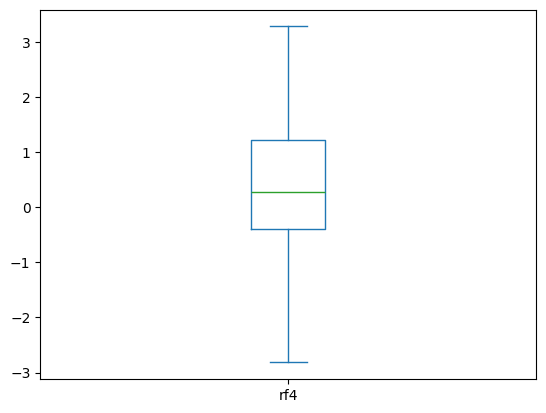

In [32]:
da["rf4"].plot(kind = 'box')

<Axes: ylabel='Density'>

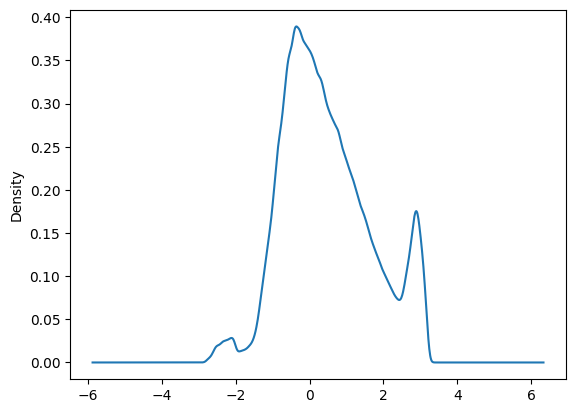

In [33]:
da["rf4"].plot(kind = 'kde')

In [34]:
da["rf4"].describe()

count    8.800015e+06
mean     4.668955e-01
std      1.195186e+00
min     -2.818000e+00
25%     -4.050000e-01
50%      2.810000e-01
75%      1.216000e+00
max      3.278000e+00
Name: rf4, dtype: float64

try to add risk factor to the result

In [35]:
stock_rtn = pd.read_csv("stock_rtn_with_feature_3_quarter.csv")
stock_rtn_layer_10 = stock_rtn[stock_rtn.layer == 10]
feature_9 = pd.read_csv("feature_9.csv")
feature_9["fut_rtn_1d"] = np.exp(feature_9["log_ret_1"])-1
feature_9 = feature_9.drop(["log_ret_1"],axis = 1)
feature_9 = feature_9.drop(["Unnamed: 0"],axis = 1)
stock_rtn_layer_10 = pd.merge(stock_rtn_layer_10,feature_9,on = ["data_date","security_id"],how = "left")
stock_rtn_layer_10 = stock_rtn_layer_10.dropna()

In [36]:
stock_rtn

,Unnamed: 0.2,Unnamed: 0.1,Unnamed: 0,data_date,security_id,close_price,volume,group_id,in_trading_universe,ret1d,log_ret_1,year,month,quarter,matching_quarter,d3,layer
0,283581,283581,283581,20100401,77901,22.690,101968.0,20102010,N,0.003095,0.016609,2010,201004,2010q2,2010q2,114.744948,8
1,283582,283582,283582,20100401,78001,24.880,181509.0,20101010,Y,0.002417,0.019109,2010,201004,2010q2,2010q2,129.845322,9
2,283583,283583,283583,20100401,78401,22.140,2223226.0,20104020,Y,0.013736,-0.003620,2010,201004,2010q2,2010q2,81.574331,7
3,283585,283585,283585,20100401,83501,7.730,381209.0,20201060,N,0.009138,0.026804,2010,201004,2010q2,2010q2,56.693439,6
4,283590,283590,283590,20100401,85801,3.920,13044.0,35103010,N,-0.020000,-0.002554,2010,201004,2010q2,2010q2,44.311207,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5854559,8873441,8799867,4488192,20171229,1117154001,48.680,1059516.0,25504030,Y,-0.018350,0.000000,2017,201712,2017q4,2017q4,5.831430,4
5854560,8873447,8799873,4488198,20171229,1117183001,11.871,2340.0,35202010,N,-0.003701,0.000000,2017,201712,2017q4,2017q4,-473.180782,1
5854561,8873462,8799888,4488213,20171229,1117266801,63.140,134357.0,35201010,Y,0.009594,0.000000,2017,201712,2017q4,2017q4,-88.534543,2
5854562,8873464,8799890,4488215,20171229,1117267401,28.840,685655.0,45101010,Y,0.000695,0.000000,2017,201712,2017q4,2017q4,78.686026,9


if the risk factor of a stock is too low it will be removed from the trading universe for the whole quarter

In [37]:
stock_rtn_layer_10

,Unnamed: 0.2,Unnamed: 0.1,Unnamed: 0,data_date,security_id,close_price,volume,group_id,in_trading_universe,ret1d,log_ret_1,year,month,quarter,matching_quarter,d3,layer,d9,fut_rtn_1d
0,283602,283601,283601,20100401,137401,8.81,297676.0,35102015,N,0.001136,0.045487,2010,201004,2010q2,2010q2,253.719218,10,7.08,0.046538
1,283602,283601,283601,20100401,137401,8.81,297676.0,35102015,N,0.001136,0.045487,2010,201004,2010q2,2010q2,253.719218,10,7.10,0.046538
2,283616,283615,283615,20100401,156201,38.46,621016.0,20104020,N,0.136189,0.038761,2010,201004,2010q2,2010q2,211.314683,10,15.17,0.039522
3,283616,283615,283615,20100401,156201,38.46,621016.0,20104020,N,0.136189,0.038761,2010,201004,2010q2,2010q2,211.314683,10,15.18,0.039522
4,283629,283628,283628,20100401,176501,6.50,151832.0,35203010,N,0.055195,0.075535,2010,201004,2010q2,2010q2,224.431664,10,8.28,0.078462
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
873179,8873316,8799742,4488067,20171229,1116103601,45.00,66051.0,40301040,N,-0.008374,0.000000,2017,201712,2017q4,2017q4,112.716700,10,10.05,0.000000
873180,8873316,8799742,4488067,20171229,1116103601,45.00,66051.0,40301040,N,-0.008374,0.000000,2017,201712,2017q4,2017q4,112.716700,10,11.01,0.000000
873181,8873378,8799804,4488129,20171229,1116431301,44.33,248186.0,25502020,Y,-0.011153,0.000000,2017,201712,2017q4,2017q4,106.917910,10,3.22,0.000000
873182,8873386,8799812,4488137,20171229,1116556401,51.71,568806.0,40301020,Y,-0.002123,0.000000,2017,201712,2017q4,2017q4,264.588209,10,4.50,0.000000


In [38]:
stock_rtn_layer_10 = pd.merge(stock_rtn_layer_10,da,on = ["data_date","security_id"],how = "left")
stock_rtn_layer_10 = stock_rtn_layer_10.fillna(0)

In [39]:
stock_rtn_layer_10["if_rf4_low"] = "N"
stock_rtn_layer_10["if_rf4_low"][stock_rtn_layer_10.rf4 <-1] = "Y"

In [40]:
def cal_rtn(series):
    num = len(series)
    list_temp = []
    ret_temp = 1
    for i in range(num):
        ret_temp *= (1+series[i])
        list_temp.append(ret_temp)
    return list_temp

def Rank_qcut(vector, K):
    quantile = np.array([float(i) / K for i in range(K + 1)]) # Quantile: K+1 values
    funBounder = lambda x: (quantile >= x).argmax()
    return vector.rank(pct=True).apply(funBounder)

def classificaiton_rtn(dataframe):
    date_list = sorted(list(set(dataframe.data_date)))
    df_init = []
    trade_list = []
    for i in range(len(date_list)):
        q1 = dataframe[dataframe.data_date == date_list[i]]
        factor_df_layers = Rank_qcut(q1["d9"], 20) #classify as 20 layers 
        q1 = q1[q1.if_rf4_low == "N"]
        q1["layer"] = factor_df_layers
        trade_list.append(list(set(q1["security_id"])))

        if len(trade_list) >=2:
            temp_1 = trade_list[i]
            temp_2 = trade_list[i-1]
            temp_3 = list(set(temp_1).intersection(set(temp_2)))
            turnover_temp = 2-2*(len(temp_3)/max(len(temp_1),len(temp_2)))
        else:
            turnover_temp = 0
        
        
            
        rtn_temp = pd.DataFrame(q1.groupby("layer")["fut_rtn_1d"].mean()-0.0001*turnover_temp)
        if len(df_init) == 0:
            df_init = rtn_temp
        else:
            df_init = pd.concat([df_init,rtn_temp],axis = 1)
    return df_init

def add_quarter_month(dataframe):
    def tranfer(string):
        if string in ["01","02","03"]:
            return 1
        if string in ["04","05","06"]:
            return 2
        if string in ["07","08","09"]:
            return 3
        if string in ["10","11","12"]:
            return 4
    dataframe["year"] = dataframe["data_date"].apply(lambda x: int(str(x)[:4]))
    dataframe["month"] = dataframe["data_date"].apply(lambda x:str(x)[:6])
    dataframe["quarter"] = dataframe["data_date"].apply(lambda x: tranfer(str(x)[4:6]))
    dataframe["year"] = dataframe["year"].apply(lambda x: str(x))
    dataframe["quarter"] = dataframe["quarter"].apply(lambda x: "q"+str(x))
    dataframe["quarter"]  = dataframe["year"] + dataframe["quarter"] 
    return dataframe



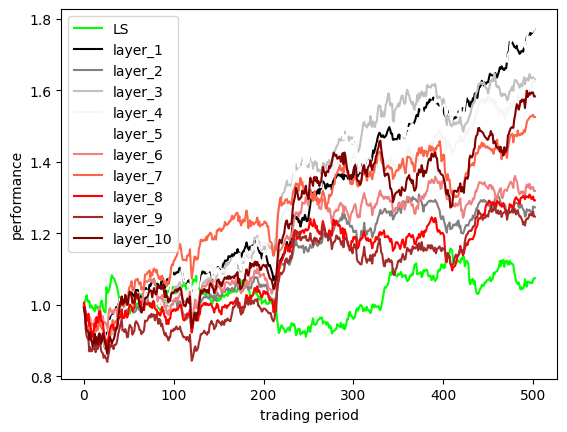

max drawdown： -0.11590748802519046
annual return 0.3365075777206341
Sharpe ratio 2.5978413356034156
volatility 0.12953353736765896
wining rate 0.5745526838966203
annual turnover: 1873%


In [36]:
stock_rtn_layer_10 = stock_rtn_layer_10[(stock_rtn_layer_10.year >= 2016)]
df = classificaiton_rtn(stock_rtn_layer_10)
df_T = df.T
df_T.index = range(len(df_T))
df_T["LS"] = df_T[1]-df_T[10]
#折线图
x = df_T.index
k1 = cal_rtn(df_T[1])
k2 = cal_rtn(df_T[2])
k3 = cal_rtn(df_T[3])
k4 = cal_rtn(df_T[4])
k5 = cal_rtn(df_T[5])
k6 = cal_rtn(df_T[6])
k7 = cal_rtn(df_T[7])
k8 = cal_rtn(df_T[8])
k9 = cal_rtn(df_T[9])
k10 = cal_rtn(df_T[10])
k11 = cal_rtn(df_T["LS"])
plt.plot(x,k11,color = 'lime',label="LS")


plt.plot(x,k1,color = 'black',label="layer_1")
plt.plot(x,k2,color = 'gray',label="layer_2")
plt.plot(x,k3,color = 'silver',label="layer_3")
plt.plot(x,k4,color = 'whitesmoke',label="layer_4")
plt.plot(x,k5,color = 'white',label="layer_5")
plt.plot(x,k6,color = 'lightcoral',label="layer_6")
plt.plot(x,k7,color = 'tomato',label="layer_7")
plt.plot(x,k8,color = 'red',label="layer_8")
plt.plot(x,k9,color = 'brown',label="layer_9")
plt.plot(x,k10,color = 'maroon',label="layer_10")
plt.xlabel("trading period")#横坐标名字
plt.ylabel("performance")#纵坐标名字
plt.legend(loc = "best")#图例
plt.show()

k = pd.Series(k1)

print('max drawdown：', np.min(k / np.maximum.accumulate(k) - 1))
print('annual return', (k.iloc[-1]/k.iloc[0])**(252/len(k.index))-1)
print('Sharpe ratio',((k.iloc[-1]/k.iloc[0])**(252/len(k.index))-1)/(k.pct_change().std()* np.sqrt(252)))
print("volatility",k.pct_change().std()* np.sqrt(252))
l = k.pct_change()>0
print("wining rate", len(l[l == True])/len(k))
print("annual turnover:", "1873%" )

try on the class with trading universe restriction

In [84]:
feature_3 = pd.read_csv("feature_3_monthly_quarterly.csv")
feature_3 = add_quarter_month(feature_3)
feature_3 = feature_3[["security_id","d3","next_quarter"]]
feature_3["matching_quarter"] = feature_3["next_quarter"]
feature_3["matching_quarter"] = feature_3["matching_quarter"].apply(lambda x: str(x))
feature_3 = feature_3.drop("next_quarter",axis =1)

stock_rtn = pd.read_csv("stock_rtn.csv")
stock_rtn = add_quarter_month(stock_rtn)
stock_rtn["matching_quarter"] = stock_rtn["quarter"]
stock_rtn = pd.merge(stock_rtn,feature_3,on = ["security_id","matching_quarter"],how = "left")
stock_rtn = stock_rtn.dropna()

In [85]:
stock_rtn = pd.merge(stock_rtn,da,on = ["data_date","security_id"],how = "left")
stock_rtn = stock_rtn.fillna(0)
stock_rtn["if_rf4_low"] = "N"
stock_rtn["if_rf4_low"][stock_rtn.rf4 <-1.5] = "Y"

stock_rtn

,Unnamed: 0.1,Unnamed: 0_x,data_date,security_id,close_price,volume,group_id,in_trading_universe,ret1d,log_ret_1_x,...,rf3,rf4,rf5,rf6,log_ret_1_y,log_ret_5,log_ret_10,log_ret_22,log_ret_66,if_rf4_low
0,283581,283581,20100401,77901,22.690,101968.0,20102010,N,0.003095,0.016609,...,-0.968,-0.427,0.729,0.208,0.016609,-3.089808e-03,0.038899,0.035502,0.037783,N
1,283582,283582,20100401,78001,24.880,181509.0,20101010,Y,0.002417,0.019109,...,-0.012,0.849,0.787,0.253,0.019109,-2.062110e-09,-0.017843,-0.033098,-0.437733,N
2,283583,283583,20100401,78401,22.140,2223226.0,20104020,Y,0.013736,-0.003620,...,-0.423,-0.529,0.235,-0.092,-0.003620,8.545092e-03,0.008097,-0.166193,-0.187212,N
3,283585,283585,20100401,83501,7.730,381209.0,20201060,N,0.009138,0.026804,...,2.082,-1.708,-1.039,-1.255,0.026804,-7.792276e-03,-0.043629,0.078350,-0.429689,Y
4,283590,283590,20100401,85801,3.920,13044.0,35103010,N,-0.020000,-0.002554,...,0.996,0.128,2.073,-2.743,-0.002554,3.755134e-02,0.008535,-0.060465,-0.202941,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5854559,8799867,4488192,20171229,1117154001,48.680,1059516.0,25504030,Y,-0.018350,0.000000,...,1.456,-0.719,2.271,-0.835,0.000000,0.000000e+00,0.000000,0.000000,0.000000,N
5854560,8799873,4488198,20171229,1117183001,11.871,2340.0,35202010,N,-0.003701,0.000000,...,2.473,1.114,-1.507,-2.691,0.000000,0.000000e+00,0.000000,0.000000,0.000000,N
5854561,8799888,4488213,20171229,1117266801,63.140,134357.0,35201010,Y,0.009594,0.000000,...,2.939,-0.787,1.309,-1.995,0.000000,0.000000e+00,0.000000,0.000000,0.000000,N
5854562,8799890,4488215,20171229,1117267401,28.840,685655.0,45101010,Y,0.000695,0.000000,...,0.692,1.286,0.429,-0.372,0.000000,0.000000e+00,0.000000,0.000000,0.000000,N


In [86]:
stock_rtn

,Unnamed: 0.1,Unnamed: 0_x,data_date,security_id,close_price,volume,group_id,in_trading_universe,ret1d,log_ret_1_x,...,rf3,rf4,rf5,rf6,log_ret_1_y,log_ret_5,log_ret_10,log_ret_22,log_ret_66,if_rf4_low
0,283581,283581,20100401,77901,22.690,101968.0,20102010,N,0.003095,0.016609,...,-0.968,-0.427,0.729,0.208,0.016609,-3.089808e-03,0.038899,0.035502,0.037783,N
1,283582,283582,20100401,78001,24.880,181509.0,20101010,Y,0.002417,0.019109,...,-0.012,0.849,0.787,0.253,0.019109,-2.062110e-09,-0.017843,-0.033098,-0.437733,N
2,283583,283583,20100401,78401,22.140,2223226.0,20104020,Y,0.013736,-0.003620,...,-0.423,-0.529,0.235,-0.092,-0.003620,8.545092e-03,0.008097,-0.166193,-0.187212,N
3,283585,283585,20100401,83501,7.730,381209.0,20201060,N,0.009138,0.026804,...,2.082,-1.708,-1.039,-1.255,0.026804,-7.792276e-03,-0.043629,0.078350,-0.429689,Y
4,283590,283590,20100401,85801,3.920,13044.0,35103010,N,-0.020000,-0.002554,...,0.996,0.128,2.073,-2.743,-0.002554,3.755134e-02,0.008535,-0.060465,-0.202941,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5854559,8799867,4488192,20171229,1117154001,48.680,1059516.0,25504030,Y,-0.018350,0.000000,...,1.456,-0.719,2.271,-0.835,0.000000,0.000000e+00,0.000000,0.000000,0.000000,N
5854560,8799873,4488198,20171229,1117183001,11.871,2340.0,35202010,N,-0.003701,0.000000,...,2.473,1.114,-1.507,-2.691,0.000000,0.000000e+00,0.000000,0.000000,0.000000,N
5854561,8799888,4488213,20171229,1117266801,63.140,134357.0,35201010,Y,0.009594,0.000000,...,2.939,-0.787,1.309,-1.995,0.000000,0.000000e+00,0.000000,0.000000,0.000000,N
5854562,8799890,4488215,20171229,1117267401,28.840,685655.0,45101010,Y,0.000695,0.000000,...,0.692,1.286,0.429,-0.372,0.000000,0.000000e+00,0.000000,0.000000,0.000000,N


In [87]:
def classificaiton_rtn_daily(dataframe):
    date_list = sorted(list(set(dataframe.data_date)))
    df_init = []
    for i in range(len(date_list)):
        q1 = dataframe[dataframe.data_date == date_list[i]]
        factor_df_layers = Rank_qcut(q1["d3"], 10)
        q1["layer"] = factor_df_layers
        q1 = q1[q1.in_trading_universe == "Y"]
        q1 = q1[q1.if_rf4_low == "N"]

        rtn_temp = pd.DataFrame(q1.groupby("layer")["ret1d"].mean())
        if len(df_init) == 0:
            df_init = rtn_temp
        else:
            df_init = pd.concat([df_init,rtn_temp],axis = 1)
    return df_init

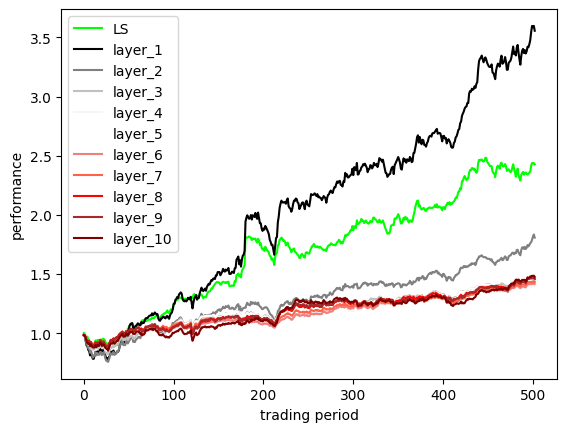

max drawdown： -0.21243785420611627
annual return 0.9006818354586972
Sharpe ratio 3.2899207758319746
volatility 0.27377006828710865
wining rate 0.5745526838966203
annual turnover: 800%


In [88]:
stock_rtn_test= stock_rtn[stock_rtn.year >= "2016"]
df = classificaiton_rtn_daily(stock_rtn_test)
df_T = df.T
df_T.index = range(len(df_T))
df_T["LS"] = df_T[1]-df_T[10]
#折线图
x = df_T.index
k1 = cal_rtn(df_T[1])
k2 = cal_rtn(df_T[2])
k3 = cal_rtn(df_T[3])
k4 = cal_rtn(df_T[4])
k5 = cal_rtn(df_T[5])
k6 = cal_rtn(df_T[6])
k7 = cal_rtn(df_T[7])
k8 = cal_rtn(df_T[8])
k9 = cal_rtn(df_T[9])
k10 = cal_rtn(df_T[10])
k11 = cal_rtn(df_T["LS"])
plt.plot(x,k11,color = 'lime',label="LS")


plt.plot(x,k1,color = 'black',label="layer_1")
plt.plot(x,k2,color = 'gray',label="layer_2")
plt.plot(x,k3,color = 'silver',label="layer_3")
plt.plot(x,k4,color = 'whitesmoke',label="layer_4")
plt.plot(x,k5,color = 'white',label="layer_5")
plt.plot(x,k6,color = 'lightcoral',label="layer_6")
plt.plot(x,k7,color = 'tomato',label="layer_7")
plt.plot(x,k8,color = 'red',label="layer_8")
plt.plot(x,k9,color = 'brown',label="layer_9")
plt.plot(x,k10,color = 'maroon',label="layer_10")
plt.xlabel("trading period")#横坐标名字
plt.ylabel("performance")#纵坐标名字
plt.legend(loc = "best")#图例
plt.show()

k = pd.Series(k1)
print('max drawdown：', np.min(k / np.maximum.accumulate(k) - 1))
print('annual return', (k.iloc[-1]/k.iloc[0])**(252/len(k.index))-1)
print('Sharpe ratio',((k.iloc[-1]/k.iloc[0])**(252/len(k.index))-1)/(k.pct_change().std()* np.sqrt(252)))
print("volatility",k.pct_change().std()* np.sqrt(252))
l = k.pct_change()>0
print("wining rate", len(l[l == True])/len(k))
print("annual turnover:", "800%" )